# Initializing project

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import time

#for google access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_path = "../content/drive/My Drive/CSCI_534 Project/Project/Nokia Data"
# project_path = './'

nokia_stock = pd.read_csv(project_path+'/Nokia Stock Data.csv') #181 of sample
nokia_liwc = pd.read_csv(project_path+'/nokia_liwc.csv') #250446 of samples

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nokia_liwc = nokia_liwc.dropna(subset=['Datetime','Text','drives','affiliation','achieve','power','reward','risk'])
nokia_liwc.shape #250445

(250445, 97)

# Preparing data

In this part, we will combine and prepare the data is neccessary for the model to learn such as date, stock price and liwc scores.

In [4]:
#In this part we are preparing data for processing (taking datetime and scores from liwc data)
nokia_liwc_date = nokia_liwc['Datetime'].to_numpy()
nokia_liwc_drives = nokia_liwc['drives'].to_numpy()
nokia_liwc_affiliation = nokia_liwc['affiliation'].to_numpy()
nokia_liwc_achieve = nokia_liwc['achieve'].to_numpy()
nokia_liwc_power = nokia_liwc['power'].to_numpy()
nokia_liwc_reward = nokia_liwc['reward'].to_numpy()
nokia_liwc_risk = nokia_liwc['risk'].to_numpy()

In [5]:
#Cleaning nokia data
for i in range(len(nokia_liwc_date)):
    nokia_liwc_date[i] = nokia_liwc_date[i].split()[0] #cleaning the data only the date
    #change date fromat
    #mm/dd/yyy
    nokia_liwc_date[i]=time.strptime(nokia_liwc_date[i],'%Y-%m-%d') 
    nokia_liwc_date[i]=time.strftime('%m/%d/%Y',nokia_liwc_date[i])

In [6]:
#put nokia liwc data in df
nokia_liwc_df = pd.DataFrame({
    'Date':nokia_liwc_date,
    'drives':nokia_liwc_drives,
    'affiliation':nokia_liwc_affiliation,
    'achieve':nokia_liwc_achieve,
    'power':nokia_liwc_power,
    'reward':nokia_liwc_reward,
    'risk':nokia_liwc_risk
})
#combine data on the same date(caculate the descriptive statistics of "drives","affiliation","achieve","power","reward","risk")
#mean
nokia_liwc_df_mean = nokia_liwc_df.groupby(['Date']).agg({'drives':np.mean,'affiliation':np.mean,'achieve':np.mean,'power':np.mean,'reward':np.mean,'risk':np.mean}).reset_index()
#median
nokia_liwc_df_median = nokia_liwc_df.groupby(['Date']).agg({'drives':np.median,'affiliation':np.median,'achieve':np.median,'power':np.median,'reward':np.median,'risk':np.median}).reset_index()
#std
nokia_liwc_df_std = nokia_liwc_df.groupby(['Date']).agg({'drives':np.std,'affiliation':np.std,'achieve':np.std,'power':np.std,'reward':np.std,'risk':np.std}).reset_index()
#max
nokia_liwc_df_max = nokia_liwc_df.groupby(['Date']).agg({'drives':np.max,'affiliation':np.max,'achieve':np.max,'power':np.max,'reward':np.max,'risk':np.max}).reset_index()
#min
nokia_liwc_df_min = nokia_liwc_df.groupby(['Date']).agg({'drives':np.min,'affiliation':np.min,'achieve':np.min,'power':np.min,'reward':np.min,'risk':np.min}).reset_index()

In [7]:
#clean the stock date(taking datetime and close from stock data)
nokia_stock_date = nokia_stock['Date'].to_numpy()
nokia_stock_close = nokia_stock['Close'].to_numpy()

In [8]:
#get stock date and change format
for i in range(len(nokia_stock_date)):
  nokia_stock_date[i] = nokia_stock_date[i].split()[0]
  nokia_stock_date[i]=time.strptime(nokia_stock_date[i],'%m/%d/%Y')
  nokia_stock_date[i]=time.strftime('%m/%d/%Y',nokia_stock_date[i])

In [9]:
#put nokia stock data in df
nokia_stock_df = pd.DataFrame({
    'Date':nokia_stock_date,
    'close':nokia_stock_close
})
#nokia_stock_df

In [10]:
#normalizing the stock value
nokia_stock_df['close'] = (nokia_stock_df['close'] - nokia_stock_df['close'].min()) / (nokia_stock_df['close'].max() - nokia_stock_df['close'].min())
#nokia_stock_df

In [12]:
#merge liwc mean data and stock data
nokia_merge_df_mean = pd.merge(nokia_liwc_df_mean,nokia_stock_df,on='Date',how="left")
nokia_merge_df_mean = nokia_merge_df_mean.dropna().reset_index(drop=True)

#median
nokia_merge_df_median = pd.merge(nokia_liwc_df_median,nokia_stock_df,on='Date',how="left")
nokia_merge_df_median = nokia_merge_df_median.dropna().reset_index(drop=True)

#std
nokia_merge_df_std = pd.merge(nokia_liwc_df_std,nokia_stock_df,on='Date',how="left")
nokia_merge_df_std = nokia_merge_df_std.dropna().reset_index(drop=True)

#max
nokia_merge_df_max = pd.merge(nokia_liwc_df_max,nokia_stock_df,on='Date',how="left")
nokia_merge_df_max = nokia_merge_df_max.dropna().reset_index(drop=True)

#min
nokia_merge_df_min = pd.merge(nokia_liwc_df_min,nokia_stock_df,on='Date',how="left")
nokia_merge_df_min = nokia_merge_df_min.dropna().reset_index(drop=True)

nokia_merge_df_mean.shape #44 days worth of data

(44, 8)

# Training the linear model

Training the linear model for Nokia

In [13]:
#Creating a model based on the nokia data
#nokia_merge_df[['drives','affiliation','achieve','power','reward','risk']] is the data or x or feature
#nokia_merge_df[['close']] is the label
#mean
reg_nokia_mean = LinearRegression().fit(nokia_merge_df_mean[['drives','affiliation','achieve','power','reward','risk']][:-10], nokia_merge_df_mean[['close']][:-10])
#median
reg_nokia_median = LinearRegression().fit(nokia_merge_df_median[['drives','affiliation','achieve','power','reward','risk']][:-10], nokia_merge_df_median[['close']][:-10])
#std
reg_nokia_std = LinearRegression().fit(nokia_merge_df_std[['drives','affiliation','achieve','power','reward','risk']][:-10], nokia_merge_df_std[['close']][:-10])
#max
reg_nokia_max = LinearRegression().fit(nokia_merge_df_max[['drives','affiliation','achieve','power','reward','risk']][:-10], nokia_merge_df_max[['close']][:-10])
#min
reg_nokia_min = LinearRegression().fit(nokia_merge_df_min[['drives','affiliation','achieve','power','reward','risk']][:-10], nokia_merge_df_min[['close']][:-10])

# Plot the data and model of for each company

Predict Nokia model with all feature

In [14]:
#each model is predicting the label using the data that we have
#pred_nokia is a numpy array consisting the values of prediction of the nokia data that we use for the training
#mean 
pred_nokia_mean = reg_nokia_mean.predict(nokia_merge_df_mean[['drives','affiliation','achieve','power','reward','risk']][-10:])
#median
pred_nokia_median = reg_nokia_median.predict(nokia_merge_df_median[['drives','affiliation','achieve','power','reward','risk']][-10:])
#std
pred_nokia_std = reg_nokia_std.predict(nokia_merge_df_std[['drives','affiliation','achieve','power','reward','risk']][-10:])
#max
pred_nokia_max = reg_nokia_max.predict(nokia_merge_df_max[['drives','affiliation','achieve','power','reward','risk']][-10:])
#min
pred_nokia_min = reg_nokia_min.predict(nokia_merge_df_min[['drives','affiliation','achieve','power','reward','risk']][-10:])

#To plot the training model
#mean 
train_nokia_mean = reg_nokia_mean.predict(nokia_merge_df_mean[['drives','affiliation','achieve','power','reward','risk']][:-10])
#median
train_nokia_median = reg_nokia_median.predict(nokia_merge_df_median[['drives','affiliation','achieve','power','reward','risk']][:-10])
#std
train_nokia_std = reg_nokia_std.predict(nokia_merge_df_std[['drives','affiliation','achieve','power','reward','risk']][:-10])
#max
train_nokia_max = reg_nokia_max.predict(nokia_merge_df_max[['drives','affiliation','achieve','power','reward','risk']][:-10])
#min
train_nokia_min = reg_nokia_min.predict(nokia_merge_df_min[['drives','affiliation','achieve','power','reward','risk']][:-10])

#In this part, I am combining the data of each company with the prediction
#mean
nokia_merge_pred_mean = pd.concat([nokia_merge_df_mean[:-10], pd.DataFrame(train_nokia_mean,columns=['pred'])], axis=1)
#median
nokia_merge_pred_median = pd.concat([nokia_merge_df_median[:-10], pd.DataFrame(train_nokia_median,columns=['pred'])], axis=1)
#std
nokia_merge_pred_std = pd.concat([nokia_merge_df_std[:-10], pd.DataFrame(train_nokia_std,columns=['pred'])], axis=1)
#max
nokia_merge_pred_max = pd.concat([nokia_merge_df_max[:-10], pd.DataFrame(train_nokia_max,columns=['pred'])], axis=1)
#min
nokia_merge_pred_min = pd.concat([nokia_merge_df_min[:-10], pd.DataFrame(train_nokia_min,columns=['pred'])], axis=1)

Display the perfomance of the model

In [15]:
from sklearn.metrics import mean_squared_error

#This is the score of the prediction/ performance of the model
#mean
nokia_score_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_mean)
#median
nokia_score_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_median)
#std
nokia_score_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_std)
#max
nokia_score_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_max)
#min
nokia_score_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_min)
[nokia_score_mean,nokia_score_median,nokia_score_std,nokia_score_max,nokia_score_min]

[0.00911484624064672,
 0.00763819695201431,
 0.00910470707253686,
 0.01958366389467584,
 0.008672544148008774]

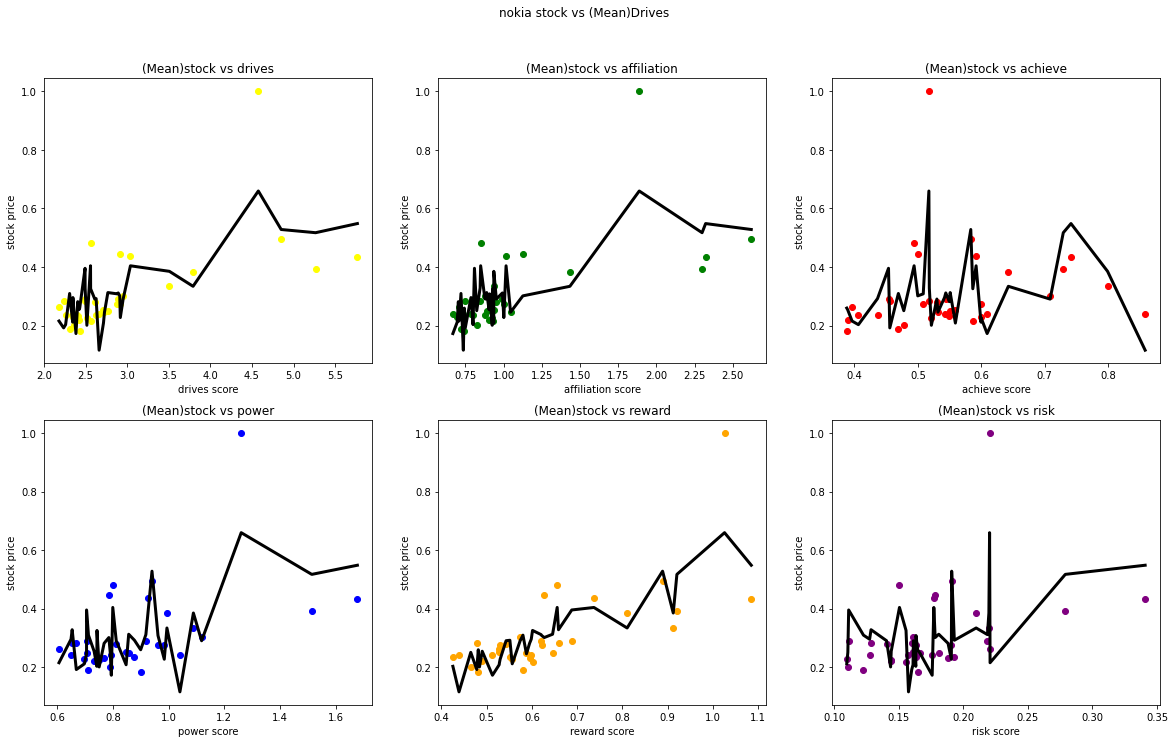

In [16]:
#plot nokia 'drives','affiliation','achieve','power','reward','risk'
#In this part, it is plotting the data with the stock + the model itself
#Mean Drives
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('nokia stock vs (Mean)Drives')
fig.set_size_inches(20,10)

nokia_sort_drives_mean = nokia_merge_pred_mean.sort_values(by=['drives'])
axs[0,0].scatter(nokia_sort_drives_mean[['drives']],nokia_sort_drives_mean[['close']],color='yellow',label='drives')#Plotting the data
axs[0,0].plot(nokia_sort_drives_mean[['drives']], nokia_sort_drives_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Mean)stock vs drives')
axs[0,0].set(xlabel='drives score', ylabel='stock price')

nokia_sort_affiliation_mean = nokia_merge_pred_mean.sort_values(by=['affiliation'])
axs[0,1].scatter(nokia_sort_affiliation_mean[['affiliation']],nokia_sort_affiliation_mean[['close']],color='green',label='affiliation')#Plotting the data
axs[0,1].plot(nokia_sort_affiliation_mean[['affiliation']], nokia_sort_affiliation_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Mean)stock vs affiliation')
axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

nokia_sort_achieve_mean = nokia_merge_pred_mean.sort_values(by=['achieve'])
axs[0,2].scatter(nokia_sort_achieve_mean[['achieve']],nokia_sort_achieve_mean[['close']],color='red',label='achieve') #Plotting the data
axs[0,2].plot(nokia_sort_achieve_mean[['achieve']], nokia_sort_achieve_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Mean)stock vs achieve')
axs[0,2].set(xlabel='achieve score', ylabel='stock price')

nokia_sort_power_mean = nokia_merge_pred_mean.sort_values(by=['power'])
axs[1,0].scatter(nokia_sort_power_mean[['power']],nokia_sort_power_mean[['close']],color='blue',label='power') #Plotting the data
axs[1,0].plot(nokia_sort_power_mean[['power']], nokia_sort_power_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Mean)stock vs power')
axs[1,0].set(xlabel='power score', ylabel='stock price')

nokia_sort_reward_mean = nokia_merge_pred_mean.sort_values(by=['reward'])
axs[1,1].scatter(nokia_sort_reward_mean[['reward']],nokia_sort_reward_mean[['close']],color='orange',label='reward') #Plotting the data
axs[1,1].plot(nokia_sort_reward_mean[['reward']], nokia_sort_reward_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Mean)stock vs reward')
axs[1,1].set(xlabel='reward score', ylabel='stock price')

nokia_sort_risk_mean = nokia_merge_pred_mean.sort_values(by=['risk'])
axs[1,2].scatter(nokia_sort_risk_mean[['risk']],nokia_sort_risk_mean[['close']],color='purple',label='risk') #Plotting the data
axs[1,2].plot(nokia_sort_risk_mean[['risk']], nokia_sort_risk_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Mean)stock vs risk')
axs[1,2].set(xlabel='risk score', ylabel='stock price')

plt.show()

In [17]:
#Median Drives

In [18]:
#Std Drives

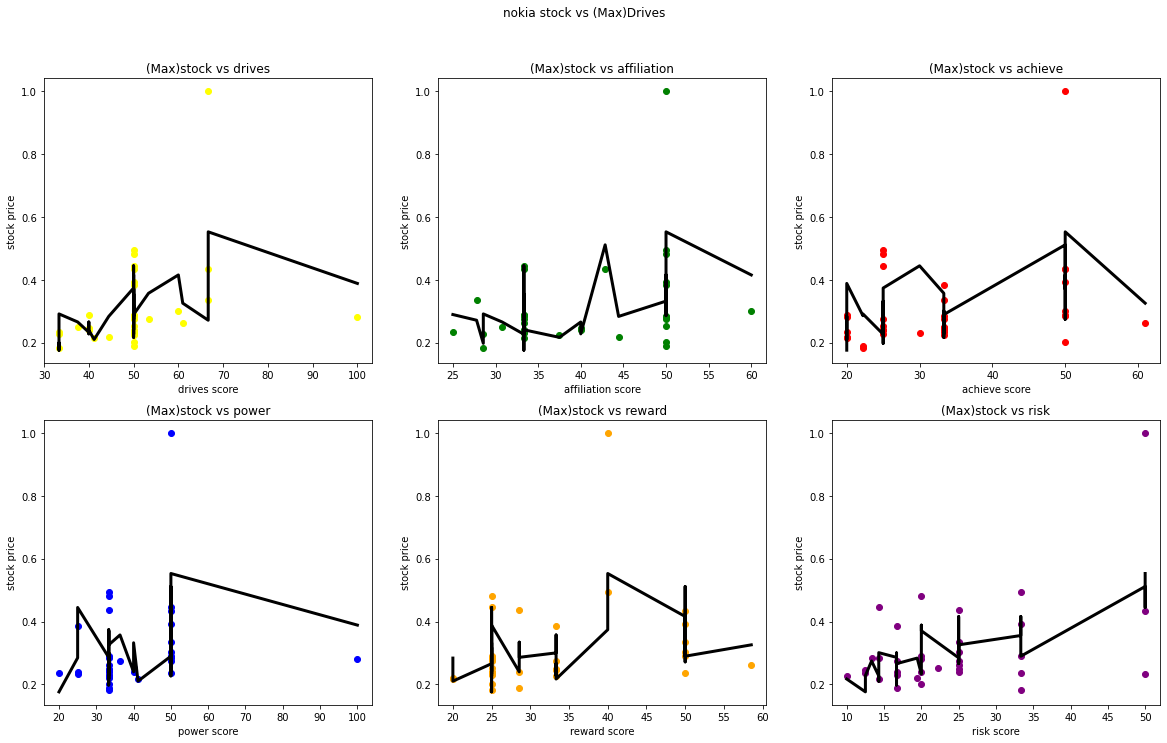

In [19]:
#Max Drives
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('nokia stock vs (Max)Drives')
fig.set_size_inches(20,10)

nokia_sort_drives_max = nokia_merge_pred_max.sort_values(by=['drives'])
axs[0,0].scatter(nokia_sort_drives_max[['drives']],nokia_sort_drives_max[['close']],color='yellow',label='drives')#Plotting the data
axs[0,0].plot(nokia_sort_drives_max[['drives']], nokia_sort_drives_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Max)stock vs drives')
axs[0,0].set(xlabel='drives score', ylabel='stock price')

nokia_sort_affiliation_max = nokia_merge_pred_max.sort_values(by=['affiliation'])
axs[0,1].scatter(nokia_sort_affiliation_max[['affiliation']],nokia_sort_affiliation_max[['close']],color='green',label='affiliation')#Plotting the data
axs[0,1].plot(nokia_sort_affiliation_max[['affiliation']], nokia_sort_affiliation_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Max)stock vs affiliation')
axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

nokia_sort_achieve_max = nokia_merge_pred_max.sort_values(by=['achieve'])
axs[0,2].scatter(nokia_sort_achieve_max[['achieve']],nokia_sort_achieve_max[['close']],color='red',label='achieve') #Plotting the data
axs[0,2].plot(nokia_sort_achieve_max[['achieve']], nokia_sort_achieve_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Max)stock vs achieve')
axs[0,2].set(xlabel='achieve score', ylabel='stock price')

nokia_sort_power_max = nokia_merge_pred_max.sort_values(by=['power'])
axs[1,0].scatter(nokia_sort_power_max[['power']],nokia_sort_power_max[['close']],color='blue',label='power') #Plotting the data
axs[1,0].plot(nokia_sort_power_max[['power']], nokia_sort_power_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Max)stock vs power')
axs[1,0].set(xlabel='power score', ylabel='stock price')

nokia_sort_reward_max = nokia_merge_pred_max.sort_values(by=['reward'])
axs[1,1].scatter(nokia_sort_reward_max[['reward']],nokia_sort_reward_max[['close']],color='orange',label='reward') #Plotting the data
axs[1,1].plot(nokia_sort_reward_max[['reward']], nokia_sort_reward_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Max)stock vs reward')
axs[1,1].set(xlabel='reward score', ylabel='stock price')

nokia_sort_risk_max = nokia_merge_pred_max.sort_values(by=['risk'])
axs[1,2].scatter(nokia_sort_risk_max[['risk']],nokia_sort_risk_max[['close']],color='purple',label='risk') #Plotting the data
axs[1,2].plot(nokia_sort_risk_max[['risk']], nokia_sort_risk_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Max)stock vs risk')
axs[1,2].set(xlabel='risk score', ylabel='stock price')

plt.show()

In [ ]:
#Min Drives

# Plot data against time

Plotting nokia stock with mean Drives

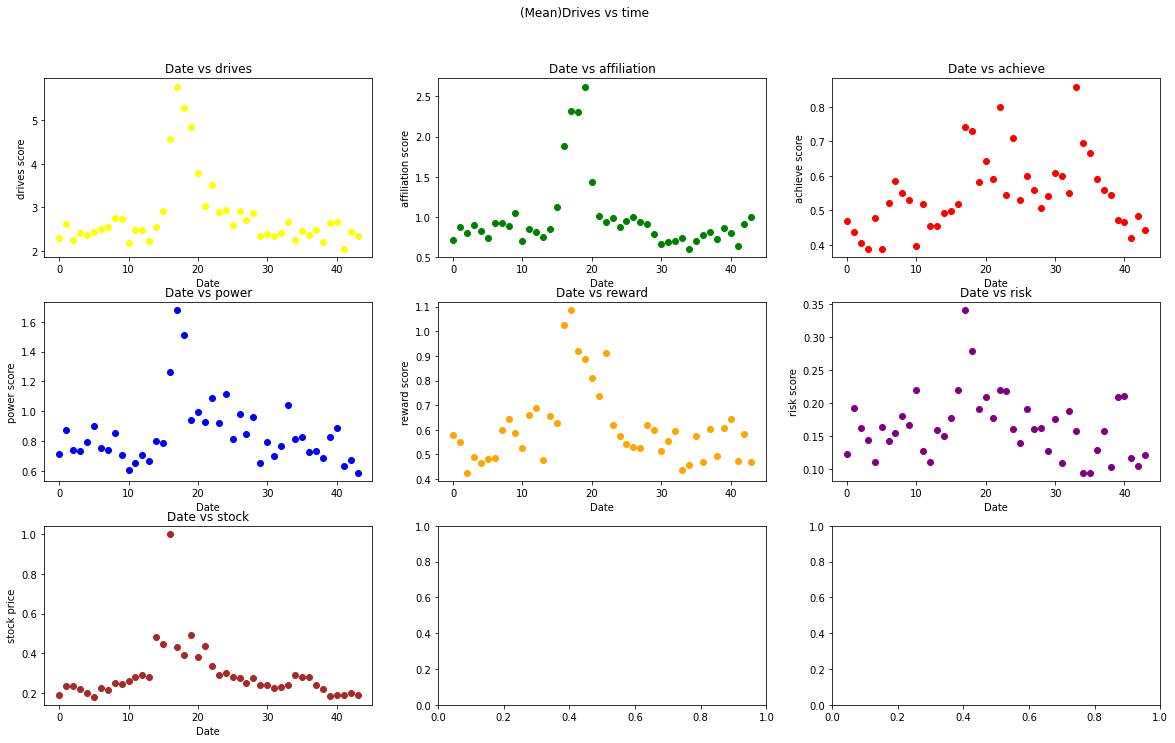

In [20]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Mean)Drives vs time')
fig.set_size_inches(20,10)

nokia_sort_drives_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_drives_mean.shape[0])],nokia_sort_drives_mean[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

nokia_sort_affiliation_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_affiliation_mean.shape[0])],nokia_sort_affiliation_mean[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

nokia_sort_achieve_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_achieve_mean.shape[0])],nokia_sort_achieve_mean[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

nokia_sort_power_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_power_mean.shape[0])],nokia_sort_power_mean[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

nokia_sort_reward_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_reward_mean.shape[0])],nokia_sort_reward_mean[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

nokia_sort_risk_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_risk_mean.shape[0])],nokia_sort_risk_mean[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

nokia_sort_date = nokia_merge_df_mean.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting nokia stock with median Drives

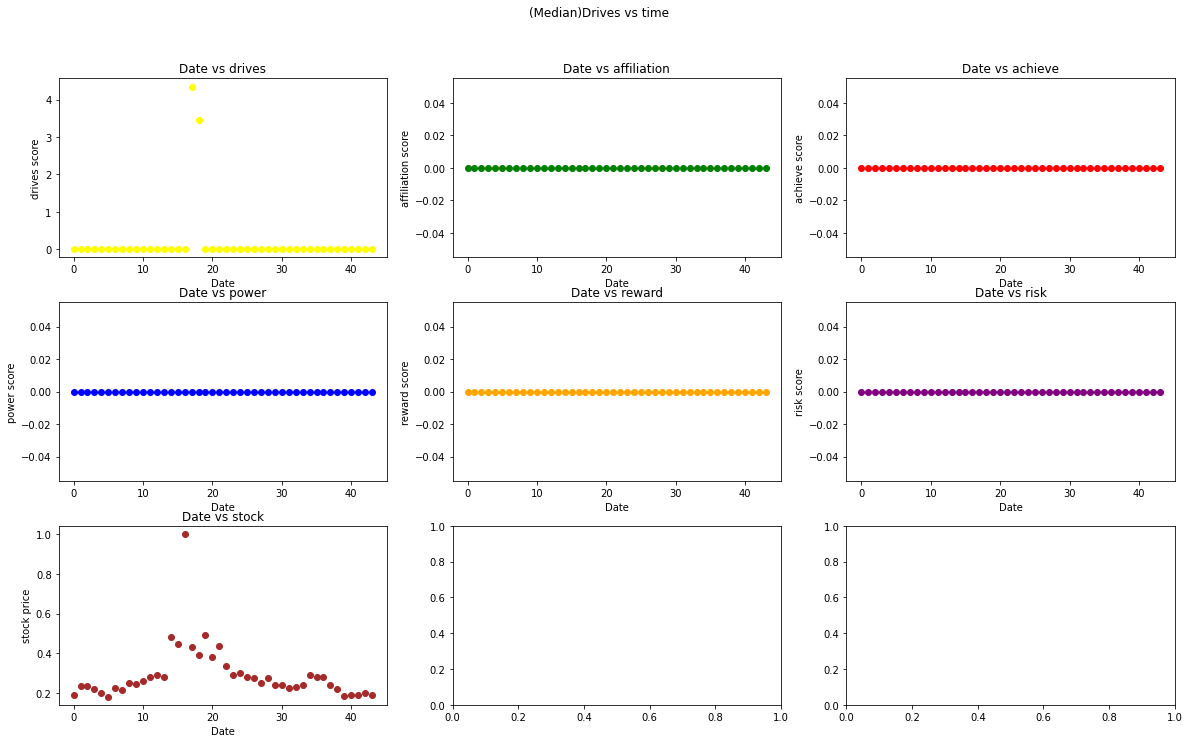

In [21]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Median)Drives vs time')
fig.set_size_inches(20,10)

nokia_sort_drives_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_drives_median.shape[0])],nokia_sort_drives_median[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

nokia_sort_affiliation_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_affiliation_median.shape[0])],nokia_sort_affiliation_median[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

nokia_sort_achieve_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_achieve_median.shape[0])],nokia_sort_achieve_median[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

nokia_sort_power_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_power_median.shape[0])],nokia_sort_power_median[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

nokia_sort_reward_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_reward_median.shape[0])],nokia_sort_reward_median[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

nokia_sort_risk_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_risk_median.shape[0])],nokia_sort_risk_median[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

nokia_sort_date = nokia_merge_df_median.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting nokia stock with std Drives

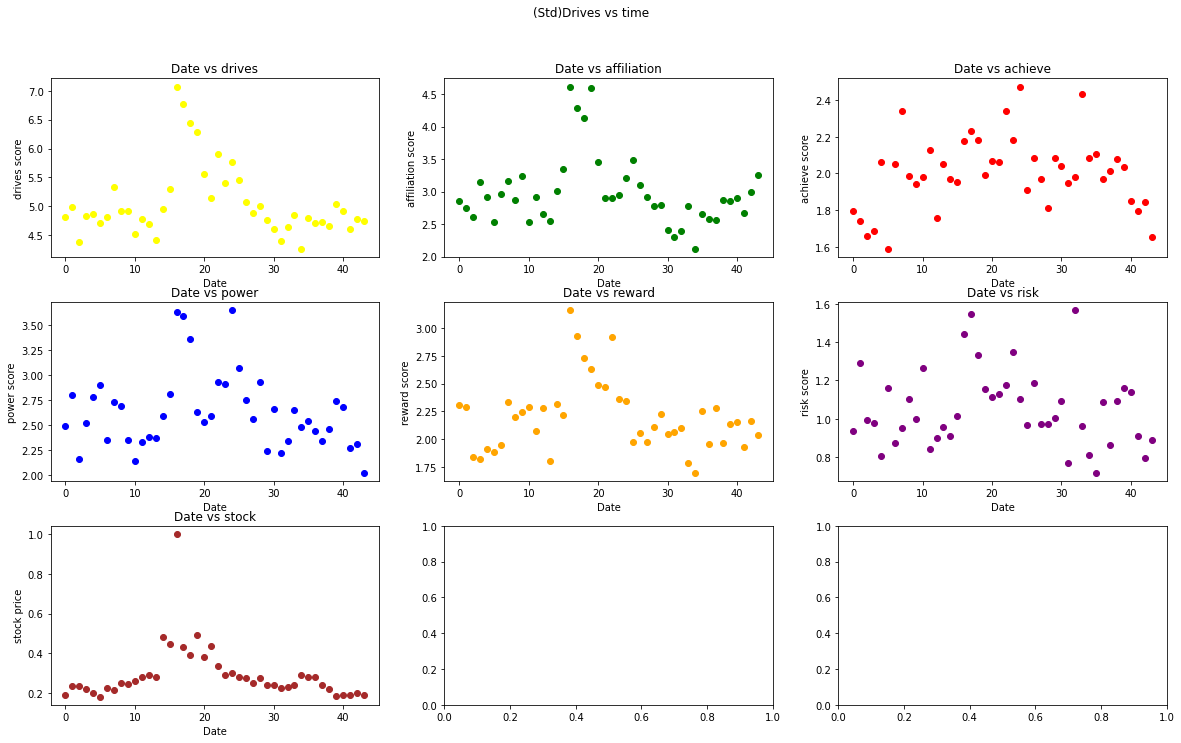

In [22]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Std)Drives vs time')
fig.set_size_inches(20,10)

nokia_sort_drives_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_drives_std.shape[0])],nokia_sort_drives_std[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

nokia_sort_affiliation_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_affiliation_std.shape[0])],nokia_sort_affiliation_std[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

nokia_sort_achieve_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_achieve_std.shape[0])],nokia_sort_achieve_std[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

nokia_sort_power_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_power_std.shape[0])],nokia_sort_power_std[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

nokia_sort_reward_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_reward_std.shape[0])],nokia_sort_reward_std[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

nokia_sort_risk_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_risk_std.shape[0])],nokia_sort_risk_std[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

nokia_sort_date = nokia_merge_df_std.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting nokia stock with maximum Drives

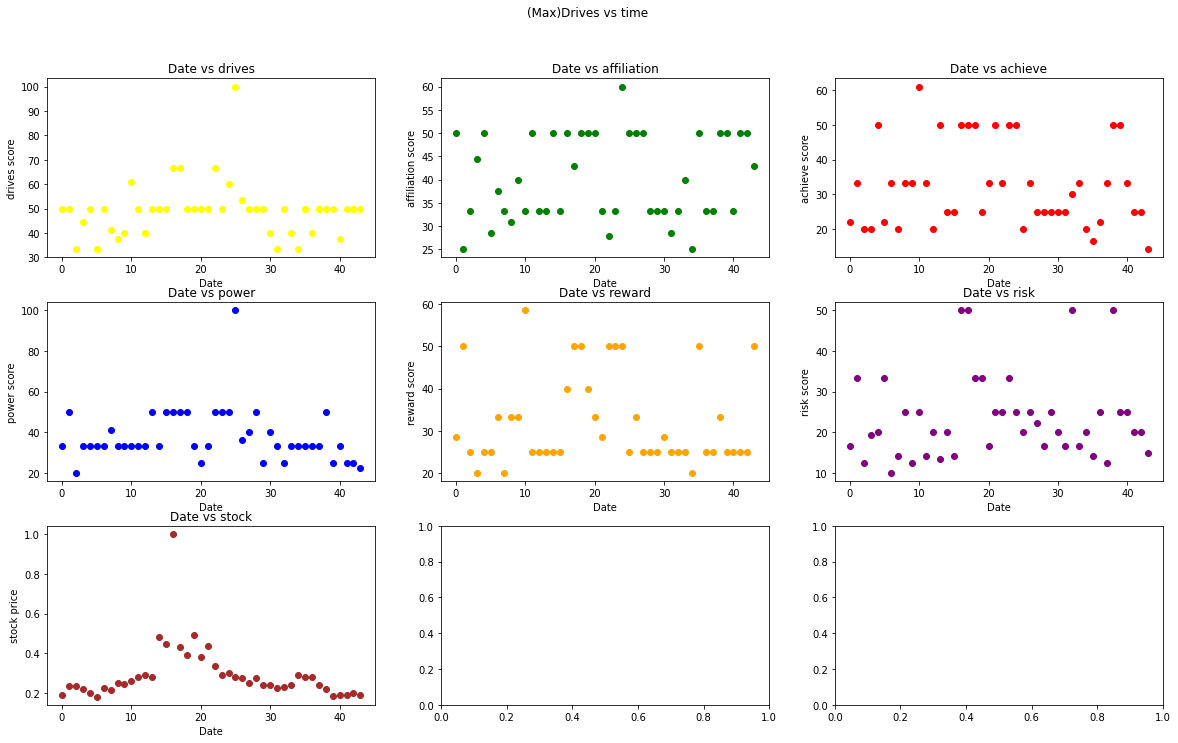

In [23]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Max)Drives vs time')
fig.set_size_inches(20,10)

nokia_sort_drives_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_drives_max.shape[0])],nokia_sort_drives_max[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

nokia_sort_affiliation_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_affiliation_max.shape[0])],nokia_sort_affiliation_max[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

nokia_sort_achieve_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_achieve_max.shape[0])],nokia_sort_achieve_max[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

nokia_sort_power_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_power_max.shape[0])],nokia_sort_power_max[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

nokia_sort_reward_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_reward_max.shape[0])],nokia_sort_reward_max[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

nokia_sort_risk_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_risk_max.shape[0])],nokia_sort_risk_max[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

nokia_sort_date = nokia_merge_df_max.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting nokia stock with minimum Drives

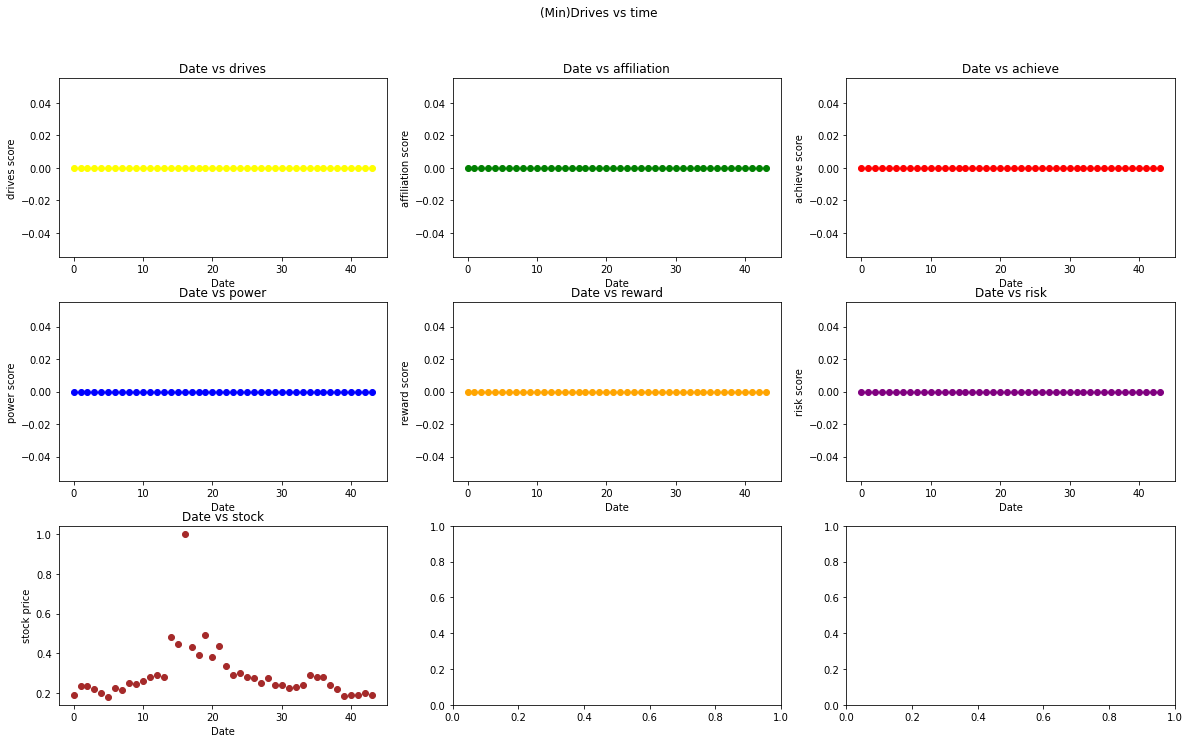

In [24]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Min)Drives vs time')
fig.set_size_inches(20,10)

nokia_sort_drives_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_drives_min.shape[0])],nokia_sort_drives_min[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

nokia_sort_affiliation_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_affiliation_min.shape[0])],nokia_sort_affiliation_min[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

nokia_sort_achieve_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_achieve_min.shape[0])],nokia_sort_achieve_min[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

nokia_sort_power_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_power_min.shape[0])],nokia_sort_power_min[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

nokia_sort_reward_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_reward_min.shape[0])],nokia_sort_reward_min[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

nokia_sort_risk_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_risk_min.shape[0])],nokia_sort_risk_min[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

nokia_sort_date = nokia_merge_df_min.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

# Training with different method

Training with mean drives

In [25]:
#Training models based on the nokia data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_nokia_drives_mean = LinearRegression().fit(nokia_merge_df_mean[['drives']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_affiliation_mean = LinearRegression().fit(nokia_merge_df_mean[['affiliation']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_achieve_mean = LinearRegression().fit(nokia_merge_df_mean[['achieve']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_power_mean = LinearRegression().fit(nokia_merge_df_mean[['power']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_reward_mean = LinearRegression().fit(nokia_merge_df_mean[['reward']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_risk_mean = LinearRegression().fit(nokia_merge_df_mean[['risk']][:-10], nokia_merge_df_mean[['close']][:-10])

In [26]:
#predict the stock price of nokia using new models
pred_nokia_drives_mean = reg_nokia_drives_mean.predict(nokia_merge_df_mean[['drives']][-10:])
pred_nokia_affiliation_mean = reg_nokia_affiliation_mean.predict(nokia_merge_df_mean[['affiliation']][-10:])
pred_nokia_achieve_mean = reg_nokia_achieve_mean.predict(nokia_merge_df_mean[['achieve']][-10:])
pred_nokia_power_mean = reg_nokia_power_mean.predict(nokia_merge_df_mean[['power']][-10:])
pred_nokia_reward_mean = reg_nokia_reward_mean.predict(nokia_merge_df_mean[['reward']][-10:])
pred_nokia_risk_mean = reg_nokia_risk_mean.predict(nokia_merge_df_mean[['risk']][-10:])

#predict on the training model to plot the data
train_nokia_drives_mean = reg_nokia_drives_mean.predict(nokia_merge_df_mean[['drives']][:-10])
train_nokia_affiliation_mean = reg_nokia_affiliation_mean.predict(nokia_merge_df_mean[['affiliation']][:-10])
train_nokia_achieve_mean = reg_nokia_achieve_mean.predict(nokia_merge_df_mean[['achieve']][:-10])
train_nokia_power_mean = reg_nokia_power_mean.predict(nokia_merge_df_mean[['power']][:-10])
train_nokia_reward_mean = reg_nokia_reward_mean.predict(nokia_merge_df_mean[['reward']][:-10])
train_nokia_risk_mean = reg_nokia_risk_mean.predict(nokia_merge_df_mean[['risk']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_mean = pd.concat([nokia_merge_df_mean[:-10], pd.DataFrame(train_nokia_drives_mean,columns=['pred_drives'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_affiliation_mean,columns=['pred_affiliation'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_achieve_mean,columns=['pred_achieve'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_power_mean,columns=['pred_power'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_reward_mean,columns=['pred_reward'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_risk_mean,columns=['pred_risk'])], axis=1)

#nokia_merge_pred1_mean.head

In [27]:
nokia_score_drives_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_drives_mean)
nokia_score_affiliation_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_affiliation_mean)
nokia_score_achieve_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_achieve_mean)
nokia_score_power_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_power_mean)
nokia_score_reward_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_reward_mean)
nokia_score_risk_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_risk_mean)
[nokia_score_drives_mean,nokia_score_affiliation_mean,nokia_score_achieve_mean,nokia_score_power_mean,nokia_score_reward_mean,nokia_score_risk_mean]

[0.0030534492023001126,
 0.004360082952633233,
 0.007110310626110931,
 0.0033717677102516356,
 0.0052862533876434515,
 0.007816470931814087]

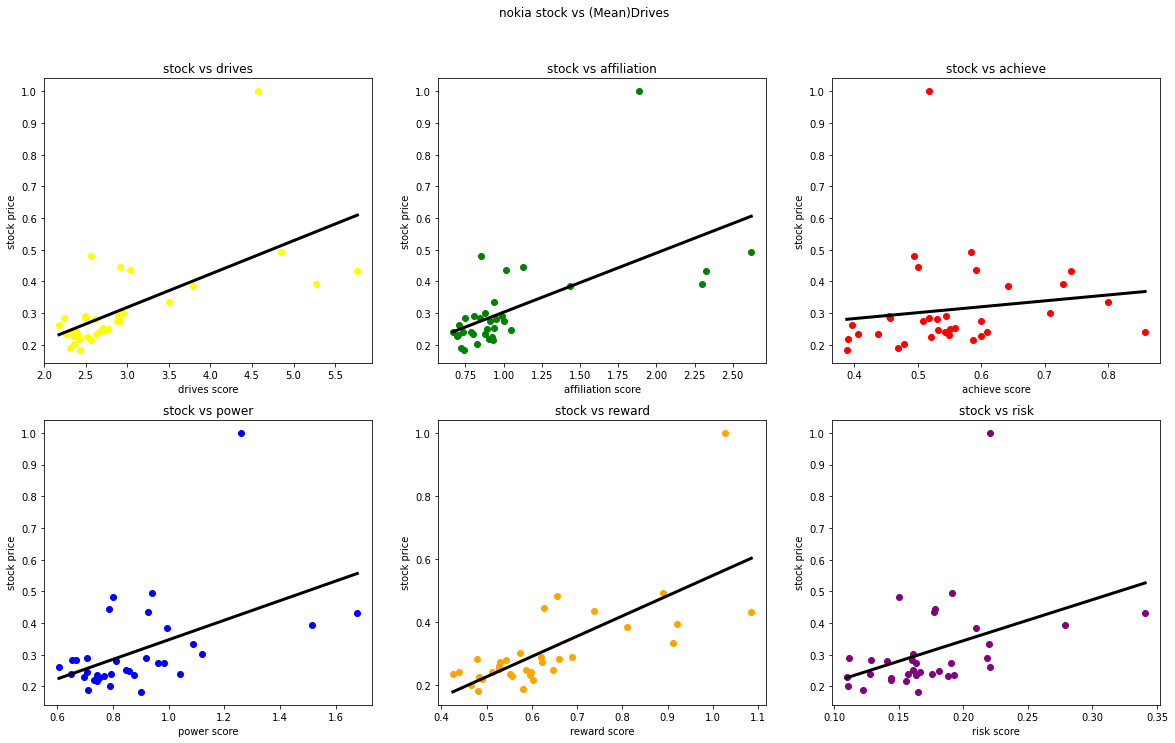

In [28]:
#plot the new nokia model ("drives","affiliation","achieve","power","reward","risk")
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('nokia stock vs (Mean)Drives')
fig.set_size_inches(20,10)

nokia_sort_drives_mean = nokia_merge_pred1_mean.sort_values(by=['drives'])
axs[0,0].scatter(nokia_sort_drives_mean[['drives']],nokia_sort_drives_mean[['close']],color='yellow',label='drives')#Plotting the data
axs[0,0].plot(nokia_sort_drives_mean[['drives']], nokia_sort_drives_mean[['pred_drives']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs drives')
axs[0,0].set(xlabel='drives score', ylabel='stock price')

nokia_sort_affiliation_mean = nokia_merge_pred1_mean.sort_values(by=['affiliation'])
axs[0,1].scatter(nokia_sort_affiliation_mean[['affiliation']],nokia_sort_affiliation_mean[['close']],color='green',label='affiliation')#Plotting the data
axs[0,1].plot(nokia_sort_affiliation_mean[['affiliation']], nokia_sort_affiliation_mean[['pred_affiliation']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs affiliation')
axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

nokia_sort_achieve_mean = nokia_merge_pred1_mean.sort_values(by=['achieve'])
axs[0,2].scatter(nokia_sort_achieve_mean[['achieve']],nokia_sort_achieve_mean[['close']],color='red',label='achieve') #Plotting the data
axs[0,2].plot(nokia_sort_achieve_mean[['achieve']], nokia_sort_achieve_mean[['pred_achieve']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs achieve')
axs[0,2].set(xlabel='achieve score', ylabel='stock price')

nokia_sort_power_mean = nokia_merge_pred1_mean.sort_values(by=['power'])
axs[1,0].scatter(nokia_sort_power_mean[['power']],nokia_sort_power_mean[['close']],color='blue',label='power')#Plotting the data
axs[1,0].plot(nokia_sort_power_mean[['power']], nokia_sort_power_mean[['pred_power']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs power')
axs[1,0].set(xlabel='power score', ylabel='stock price')

nokia_sort_reward_mean = nokia_merge_pred1_mean.sort_values(by=['reward'])
axs[1,1].scatter(nokia_sort_reward_mean[['reward']],nokia_sort_reward_mean[['close']],color='orange',label='reward')#Plotting the data
axs[1,1].plot(nokia_sort_reward_mean[['reward']], nokia_sort_reward_mean[['pred_reward']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs reward')
axs[1,1].set(xlabel='reward score', ylabel='stock price')

nokia_sort_risk_mean = nokia_merge_pred1_mean.sort_values(by=['risk'])
axs[1,2].scatter(nokia_sort_risk_mean[['risk']],nokia_sort_risk_mean[['close']],color='purple',label='risk')#Plotting the data
axs[1,2].plot(nokia_sort_risk_mean[['risk']], nokia_sort_risk_mean[['pred_risk']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs risk')
axs[1,2].set(xlabel='risk score', ylabel='stock price')

plt.show()

Training with median drives

In [32]:
#Training models based on the nokia data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_nokia_drives_median = LinearRegression().fit(nokia_merge_df_median[['drives']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_affiliation_median = LinearRegression().fit(nokia_merge_df_median[['affiliation']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_achieve_median = LinearRegression().fit(nokia_merge_df_median[['achieve']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_power_median = LinearRegression().fit(nokia_merge_df_median[['power']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_reward_median = LinearRegression().fit(nokia_merge_df_median[['reward']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_risk_median = LinearRegression().fit(nokia_merge_df_median[['risk']][:-10], nokia_merge_df_median[['close']][:-10])

In [33]:
#predict the stock price of nokia using new models
pred_nokia_drives_median = reg_nokia_drives_median.predict(nokia_merge_df_median[['drives']][-10:])
pred_nokia_affiliation_median = reg_nokia_affiliation_median.predict(nokia_merge_df_median[['affiliation']][-10:])
pred_nokia_achieve_median = reg_nokia_achieve_median.predict(nokia_merge_df_median[['achieve']][-10:])
pred_nokia_power_median = reg_nokia_power_median.predict(nokia_merge_df_median[['power']][-10:])
pred_nokia_reward_median = reg_nokia_reward_median.predict(nokia_merge_df_median[['reward']][-10:])
pred_nokia_risk_median = reg_nokia_risk_median.predict(nokia_merge_df_median[['risk']][-10:])

#predict on the training model to plot the data
train_nokia_drives_median = reg_nokia_drives_median.predict(nokia_merge_df_median[['drives']][:-10])
train_nokia_affiliation_median = reg_nokia_affiliation_median.predict(nokia_merge_df_median[['affiliation']][:-10])
train_nokia_achieve_median = reg_nokia_achieve_median.predict(nokia_merge_df_median[['achieve']][:-10])
train_nokia_power_median = reg_nokia_power_median.predict(nokia_merge_df_median[['power']][:-10])
train_nokia_reward_median = reg_nokia_reward_median.predict(nokia_merge_df_median[['reward']][:-10])
train_nokia_risk_median = reg_nokia_risk_median.predict(nokia_merge_df_median[['risk']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_median = pd.concat([nokia_merge_df_median[:-10], pd.DataFrame(train_nokia_drives_median,columns=['pred_drives'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_affiliation_median,columns=['pred_affiliation'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_achieve_median,columns=['pred_achieve'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_power_median,columns=['pred_power'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_reward_median,columns=['pred_reward'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_risk_median,columns=['pred_risk'])], axis=1)

#nokia_merge_pred1_median

In [34]:
nokia_score_drives_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_drives_median)
nokia_score_affiliation_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_affiliation_median)
nokia_score_achieve_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_achieve_median)
nokia_score_power_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_power_median)
nokia_score_reward_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_reward_median)
nokia_score_risk_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_risk_median)
[nokia_score_drives_median,nokia_score_affiliation_median,nokia_score_achieve_median,nokia_score_power_median,nokia_score_reward_median,nokia_score_risk_median]

[0.00763819695201431,
 0.008672544148008774,
 0.008672544148008774,
 0.008672544148008774,
 0.008672544148008774,
 0.008672544148008774]

In [35]:
#plot the new nokia model

Training with std drives

In [36]:
#Training models based on the nokia data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_nokia_drives_std = LinearRegression().fit(nokia_merge_df_std[['drives']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_affiliation_std = LinearRegression().fit(nokia_merge_df_std[['affiliation']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_achieve_std = LinearRegression().fit(nokia_merge_df_std[['achieve']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_power_std = LinearRegression().fit(nokia_merge_df_std[['power']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_reward_std = LinearRegression().fit(nokia_merge_df_std[['reward']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_risk_std = LinearRegression().fit(nokia_merge_df_std[['risk']][:-10], nokia_merge_df_std[['close']][:-10])

In [37]:
#predict the stock price of nokia using new models
pred_nokia_drives_std = reg_nokia_drives_std.predict(nokia_merge_df_std[['drives']][-10:])
pred_nokia_affiliation_std = reg_nokia_affiliation_std.predict(nokia_merge_df_std[['affiliation']][-10:])
pred_nokia_achieve_std = reg_nokia_achieve_std.predict(nokia_merge_df_std[['achieve']][-10:])
pred_nokia_power_std = reg_nokia_power_std.predict(nokia_merge_df_std[['power']][-10:])
pred_nokia_reward_std = reg_nokia_reward_std.predict(nokia_merge_df_std[['reward']][-10:])
pred_nokia_risk_std = reg_nokia_risk_std.predict(nokia_merge_df_std[['risk']][-10:])

#predict on the training model to plot the data
train_nokia_drives_std = reg_nokia_drives_std.predict(nokia_merge_df_std[['drives']][:-10])
train_nokia_affiliation_std = reg_nokia_affiliation_std.predict(nokia_merge_df_std[['affiliation']][:-10])
train_nokia_achieve_std = reg_nokia_achieve_std.predict(nokia_merge_df_std[['achieve']][:-10])
train_nokia_power_std = reg_nokia_power_std.predict(nokia_merge_df_std[['power']][:-10])
train_nokia_reward_std = reg_nokia_reward_std.predict(nokia_merge_df_std[['reward']][:-10])
train_nokia_risk_std = reg_nokia_risk_std.predict(nokia_merge_df_std[['risk']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_std = pd.concat([nokia_merge_df_std[:-10], pd.DataFrame(train_nokia_drives_std,columns=['pred_drives'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_affiliation_std,columns=['pred_affiliation'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_achieve_std,columns=['pred_achieve'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_power_std,columns=['pred_power'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_reward_std,columns=['pred_reward'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_risk_std,columns=['pred_risk'])], axis=1)

#nokia_merge_pred1_std

In [38]:
nokia_score_drives_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_drives_std)
nokia_score_affiliation_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_affiliation_std)
nokia_score_achieve_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_achieve_std)
nokia_score_power_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_power_std)
nokia_score_reward_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_reward_std)
nokia_score_risk_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_risk_std)
[nokia_score_drives_std,nokia_score_affiliation_std,nokia_score_achieve_std,nokia_score_power_std,nokia_score_reward_std,nokia_score_risk_std]

[0.004285664254934208,
 0.00851481059154864,
 0.0058709407507269665,
 0.003821863081314701,
 0.006318394757437724,
 0.007022624736772292]

In [ ]:
#plot the new nokia model

Training with max drives

In [39]:
#Training models based on the nokia data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_nokia_drives_max = LinearRegression().fit(nokia_merge_df_max[['drives']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_affiliation_max = LinearRegression().fit(nokia_merge_df_max[['affiliation']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_achieve_max = LinearRegression().fit(nokia_merge_df_max[['achieve']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_power_max = LinearRegression().fit(nokia_merge_df_max[['power']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_reward_max = LinearRegression().fit(nokia_merge_df_max[['reward']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_risk_max = LinearRegression().fit(nokia_merge_df_max[['risk']][:-10], nokia_merge_df_max[['close']][:-10])

In [40]:
#predict the stock price of nokia using new models
pred_nokia_drives_max = reg_nokia_drives_max.predict(nokia_merge_df_max[['drives']][-10:])
pred_nokia_affiliation_max = reg_nokia_affiliation_max.predict(nokia_merge_df_max[['affiliation']][-10:])
pred_nokia_achieve_max = reg_nokia_achieve_max.predict(nokia_merge_df_max[['achieve']][-10:])
pred_nokia_power_max = reg_nokia_power_max.predict(nokia_merge_df_max[['power']][-10:])
pred_nokia_reward_max = reg_nokia_reward_max.predict(nokia_merge_df_max[['reward']][-10:])
pred_nokia_risk_max = reg_nokia_risk_max.predict(nokia_merge_df_max[['risk']][-10:])

#predict on the training model to plot the data
train_nokia_drives_max = reg_nokia_drives_max.predict(nokia_merge_df_max[['drives']][:-10])
train_nokia_affiliation_max = reg_nokia_affiliation_max.predict(nokia_merge_df_max[['affiliation']][:-10])
train_nokia_achieve_max = reg_nokia_achieve_max.predict(nokia_merge_df_max[['achieve']][:-10])
train_nokia_power_max = reg_nokia_power_max.predict(nokia_merge_df_max[['power']][:-10])
train_nokia_reward_max = reg_nokia_reward_max.predict(nokia_merge_df_max[['reward']][:-10])
train_nokia_risk_max = reg_nokia_risk_max.predict(nokia_merge_df_max[['risk']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_max = pd.concat([nokia_merge_df_max[:-10], pd.DataFrame(train_nokia_drives_max,columns=['pred_drives'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_affiliation_max,columns=['pred_affiliation'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_achieve_max,columns=['pred_achieve'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_power_max,columns=['pred_power'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_reward_max,columns=['pred_reward'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_risk_max,columns=['pred_risk'])], axis=1)

#nokia_merge_pred1_max

In [41]:
nokia_score_drives_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_drives_max)
nokia_score_affiliation_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_affiliation_max)
nokia_score_achieve_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_achieve_max)
nokia_score_power_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_power_max)
nokia_score_reward_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_reward_max)
nokia_score_risk_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_risk_max)
[nokia_score_drives_max,nokia_score_affiliation_max,nokia_score_achieve_max,nokia_score_power_max,nokia_score_reward_max,nokia_score_risk_max]

[0.007677407318516183,
 0.01419979189541129,
 0.009812458990200274,
 0.005918170577147702,
 0.008763652835689972,
 0.012727248042097183]

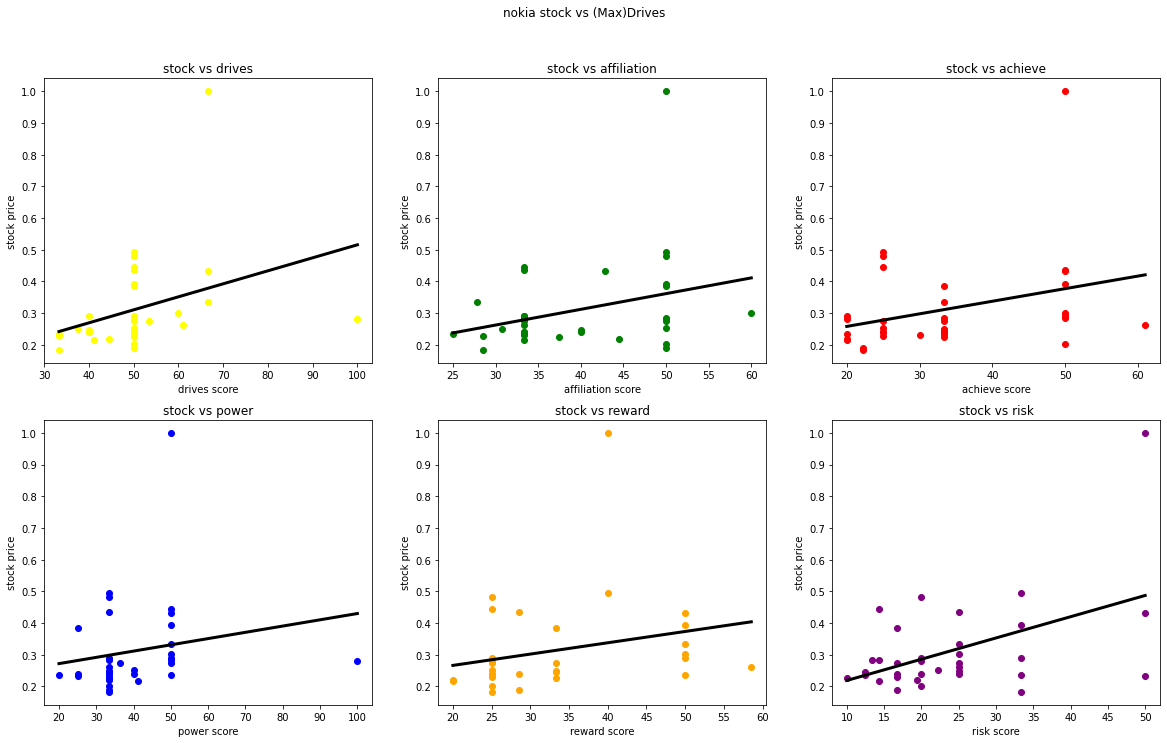

In [42]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('nokia stock vs (Max)Drives')
fig.set_size_inches(20,10)

nokia_sort_drives_max = nokia_merge_pred1_max.sort_values(by=['drives'])
axs[0,0].scatter(nokia_sort_drives_max[['drives']],nokia_sort_drives_max[['close']],color='yellow',label='drives')#Plotting the data
axs[0,0].plot(nokia_sort_drives_max[['drives']], nokia_sort_drives_max[['pred_drives']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs drives')
axs[0,0].set(xlabel='drives score', ylabel='stock price')

nokia_sort_affiliation_max = nokia_merge_pred1_max.sort_values(by=['affiliation'])
axs[0,1].scatter(nokia_sort_affiliation_max[['affiliation']],nokia_sort_affiliation_max[['close']],color='green',label='affiliation')#Plotting the data
axs[0,1].plot(nokia_sort_affiliation_max[['affiliation']], nokia_sort_affiliation_max[['pred_affiliation']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs affiliation')
axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

nokia_sort_achieve_max = nokia_merge_pred1_max.sort_values(by=['achieve'])
axs[0,2].scatter(nokia_sort_achieve_max[['achieve']],nokia_sort_achieve_max[['close']],color='red',label='achieve') #Plotting the data
axs[0,2].plot(nokia_sort_achieve_max[['achieve']], nokia_sort_achieve_max[['pred_achieve']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs achieve')
axs[0,2].set(xlabel='achieve score', ylabel='stock price')

nokia_sort_power_max = nokia_merge_pred1_max.sort_values(by=['power'])
axs[1,0].scatter(nokia_sort_power_max[['power']],nokia_sort_power_max[['close']],color='blue',label='power')#Plotting the data
axs[1,0].plot(nokia_sort_power_max[['power']], nokia_sort_power_max[['pred_power']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs power')
axs[1,0].set(xlabel='power score', ylabel='stock price')

nokia_sort_reward_max = nokia_merge_pred1_max.sort_values(by=['reward'])
axs[1,1].scatter(nokia_sort_reward_max[['reward']],nokia_sort_reward_max[['close']],color='orange',label='reward')#Plotting the data
axs[1,1].plot(nokia_sort_reward_max[['reward']], nokia_sort_reward_max[['pred_reward']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs reward')
axs[1,1].set(xlabel='reward score', ylabel='stock price')

nokia_sort_risk_max = nokia_merge_pred1_max.sort_values(by=['risk'])
axs[1,2].scatter(nokia_sort_risk_max[['risk']],nokia_sort_risk_max[['close']],color='purple',label='risk')#Plotting the data
axs[1,2].plot(nokia_sort_risk_max[['risk']], nokia_sort_risk_max[['pred_risk']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs risk')
axs[1,2].set(xlabel='risk score', ylabel='stock price')

plt.show()

Training with min drives

In [43]:
#Training models based on the nokia data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_nokia_drives_min = LinearRegression().fit(nokia_merge_df_min[['drives']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_affiliation_min = LinearRegression().fit(nokia_merge_df_min[['affiliation']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_achieve_min = LinearRegression().fit(nokia_merge_df_min[['achieve']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_power_min = LinearRegression().fit(nokia_merge_df_min[['power']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_reward_min = LinearRegression().fit(nokia_merge_df_min[['reward']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_risk_min = LinearRegression().fit(nokia_merge_df_min[['risk']][:-10], nokia_merge_df_min[['close']][:-10])

In [44]:
#predict the stock price of nokia using new models
pred_nokia_drives_min = reg_nokia_drives_min.predict(nokia_merge_df_min[['drives']][-10:])
pred_nokia_affiliation_min = reg_nokia_affiliation_min.predict(nokia_merge_df_min[['affiliation']][-10:])
pred_nokia_achieve_min = reg_nokia_achieve_min.predict(nokia_merge_df_min[['achieve']][-10:])
pred_nokia_power_min = reg_nokia_power_min.predict(nokia_merge_df_min[['power']][-10:])
pred_nokia_reward_min = reg_nokia_reward_min.predict(nokia_merge_df_min[['reward']][-10:])
pred_nokia_risk_min = reg_nokia_risk_min.predict(nokia_merge_df_min[['risk']][-10:])

#predict on the training model to plot the data
train_nokia_drives_min = reg_nokia_drives_min.predict(nokia_merge_df_min[['drives']][:-10])
train_nokia_affiliation_min = reg_nokia_affiliation_min.predict(nokia_merge_df_min[['affiliation']][:-10])
train_nokia_achieve_min = reg_nokia_achieve_min.predict(nokia_merge_df_min[['achieve']][:-10])
train_nokia_power_min = reg_nokia_power_min.predict(nokia_merge_df_min[['power']][:-10])
train_nokia_reward_min = reg_nokia_reward_min.predict(nokia_merge_df_min[['reward']][:-10])
train_nokia_risk_min = reg_nokia_risk_min.predict(nokia_merge_df_min[['risk']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_min = pd.concat([nokia_merge_df_min[:-10], pd.DataFrame(train_nokia_drives_min,columns=['pred_drives'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_affiliation_min,columns=['pred_affiliation'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_achieve_min,columns=['pred_achieve'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_power_min,columns=['pred_power'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_reward_min,columns=['pred_reward'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_risk_min,columns=['pred_risk'])], axis=1)

#nokia_merge_pred1_min

In [45]:
nokia_score_drives_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_drives_min)
nokia_score_affiliation_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_affiliation_min)
nokia_score_achieve_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_achieve_min)
nokia_score_power_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_power_min)
nokia_score_reward_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_reward_min)
nokia_score_risk_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_risk_min)
[nokia_score_drives_min,nokia_score_affiliation_min,nokia_score_achieve_min,nokia_score_power_min,nokia_score_reward_min,nokia_score_risk_min]

[0.008672544148008774,
 0.008672544148008774,
 0.008672544148008774,
 0.008672544148008774,
 0.008672544148008774,
 0.008672544148008774]

In [46]:
#plot the new gm model